## Notebook 5A  - Wed/Thurs
### Numerical derivatives of functions and data
### Total points: 10
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 0: Write a description of your data (1 pt)
Describe the conditions under which your pressure and acceleration data were taken. This will be very important for interpretting the data later. Hopefully you still remember this.
* What elevator?
* Which floors did you go between? Were there stops? 
* Did you capture up and down in one data set?
* Did anyone get on or off during hte middle of the run? If so, on which floor?
* How was the phone held? In your hand, on the floor?
* Whose phone collected the data?

# Task 1: Add your data from Monday/Tuesday to the PS5A folder, import it, and plot it
* Add the data `my_pressure_data.csv` from your previous lab into the PS5A folder so we can continue the analysis.
* If neither you, nor your lab partner, had a phone with a pressure sensor, you can use the `my_pressure_data_Z.csv` file, which corresponds to a ride in the Gosnell elevator from 3rd floor to A level and then back to 3rd floor (with stops on floors 1 and 2). 
* Import the data as `my_press`

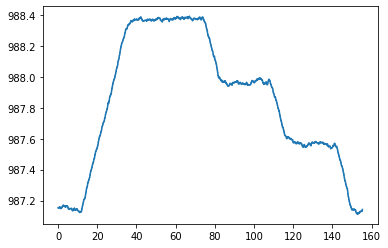

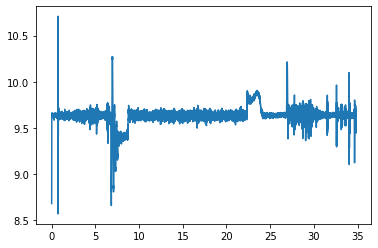

In [2]:
"""
Import my_press and my_acc using np.loadtxt() same as last class.
"""

### BEGIN SOLUTION
# pressure data: 3 -> A -> 1 -> 2 -> 3 (held phone, a custodian got on and off)
my_press = np.loadtxt("my_pressure_data_Z.csv", delimiter = ",", skiprows=1)
plt.plot(my_press[:,0], my_press[:,1])

# acceleration data: 3 -> A -> 3 (I was only rider, phone on floor)
my_acc = np.loadtxt("Elevator Gosnell Down-Copy1.csv", delimiter = ",", skiprows=1)
plt.figure()
plt.plot(my_acc[:,0], my_acc[:,3])

### END SOLUTION

In [3]:
""" Check imported arrays my_press and my_acc """
assert my_press.shape[1] == 2  # pressure data should have two columns
assert my_press.shape[0] >  15 # pressure data should have lots of rows (though many phones only do 1 data point per second)

# Task 2: copy and paste your definition of the `p_to_h()` function and use it to re-create the variable `height`
Your code needs to accomplish two goals
1. copy your definition of `p_to_h(pressure)` from previous lab, which converts a pressure in Pascals to an altutude in meter.
2. convert the pressure data to height/altitude and store in an array named `heights`
Again this is copy and paste from PS4B, but it is a necessary starting point. 

In [4]:
""" define the function p_to_h() 
    also use the p_to_h() to create an array of named height.
"""

### BEGIN SOLUTION
def p_to_h(pressure) :
    height = (1 - (pressure/101325)**(1/5.25588))/2.25577e-5
    return height

print( p_to_h( 101325 ) )
print( p_to_h( 100720 ) )

heights = p_to_h(100*my_press[:,1])

### END SOLUTION

0.0
50.483667718799104


In [6]:
""" test the p_to_h() function and the array named heights """

assert abs( p_to_h( 101325 ) ) < 1e-2
assert abs(p_to_h( 100720 )  - 50.4836677) < 1e-2
""" test the array heights """
assert len(heights) == len(my_press[:,1])
assert abs(heights.max() - p_to_h(100*min(my_press[:,1]))) <1e-5

## Task 2B: Conceptual and math questions about numerical derivatives
You can answer these questions on pencil and paper with an image of your work, or you can answer in Markdown and LaTeX.

<img src="Numerical_derivative_diagram.PNG" alt="Diagram showing 4 data points of position vs time"
 width="400" />

In terms of the time and position coordinates $(t_0,y_0),...(t_3,y_3)$ answer the following questions related to the diagram.
1. How would you calculate the velocity during the **first** time interval?
1. How would you calculate the velocity during the **second** time interval?
1. How would you calculate the velocity during the **third** time interval?
1. How would you calculate the velocity during the **$i$-th** time interval? Generalize your previous results.
1. If you have 4 data points as shown in the picture, how many velocities can you calculate? Why?
1. If you have $N$ data points, how many velocities can you calculate? Why?

# Taking derivatives (finding the slope) numerically in Python

The standard definition of velocity uses a derivative  

$$v_y = \frac{dy}{dt}$$

However, we can compute the average velocity over a finite time period using differences  

$$v_{y} = \frac{\Delta y}{\Delta t} = \frac{y_{i+1} - y_i}{t_{i+1} - t_i} $$  

We can think of the subscripts similar to an array index. For example, 

$ y_i \rightarrow$ `y[i]`  
$ y_{i+1} \rightarrow$ `y[i+1]`


# Task 3: Calculate the derivative of $y(t) = A\sin(t)$ over the interval $[0,2\pi]$
1. **Update the lines** that have some code that needs to be updated
1. **Add comments** to the lines that don't have any
1. Make sure your plot of $y$ and $v$ makes sense


length of vel_list =  99
length of t array =  100
length of vel_list =  99
length of t array =  100


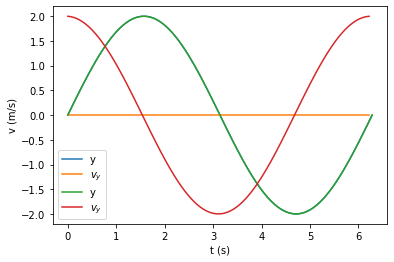

In [7]:
""" Modify the code to create 
    the derivative of the sin(t) over the full range 0 to 2*pi """

A = 2  # amplitude of simple harmonic motion (m)
t = np.linspace(0,2*np.pi,100)  
y = A*np.sin(t)  

vel_list = []  # empty list to store derivatives in


for i in range(0, len(t) - 1) :  # there is one less velocity than time values
    dy = 0.0  #  FIX THIS LINE to be Delta y for the i-th step
    dt = 1  #  FIX THIS LINE to be Delta t for the i-th step
    vel = 0  # FIX THIS LINE to be the velocity over the i-th step
    vel_list.append(vel)
    
vel_array = np.array(vel_list)
    
print("length of vel_list = ",len(vel_list))
print("length of t array = ", len(t))

plt.plot(t,y, label = "y")
plt.plot( t[0:len(t) - 1], vel_array, label = "$v_y$")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
    
### BEGIN SOLUTION
vel_list = []  # empty list to store derivatives in


for i in range(0, len(t) - 1) :  # there is one less velocity than time values
    dy = y[i+1] - y[i]  #  FIX THIS LINE to be Delta y for the i-th step
    dt = t[i+1] - t[i]  #  FIX THIS LINE to be Delta t for the i-th step
    vel = dy/dt  # FIX THIS LINE to be the velocity over the i-th step
    vel_list.append(vel)
    
vel_array = np.array(vel_list)
    
print("length of vel_list = ",len(vel_list))
print("length of t array = ", len(t))

plt.plot(t,y, label = "y")
plt.plot( t[0:len(t) - 1], vel_array, label = "$v_y$")
plt.legend()
### END SOLUTION

In [8]:
""" 
Check the numerically calculated derivative for Task 3.
Make sure your plot has axes labels and you added comments as well!
"""

assert len(vel_array) - len(t) == - 1
assert abs(np.max(vel_array) - 2) < 0.01
assert abs(np.min(vel_array) + 2) < 0.01
assert abs(np.mean(vel_array)) < 0.01 
assert abs(vel_array[0] - 2) < 0.01 # check derivative at t = 2*pi
assert abs(vel_array[-1] - 2) < 0.01  # check derivative at t = 0

# Numpy Array Method for numerical derivatives
It is possible to calculate the derivative **without** a loop as well.

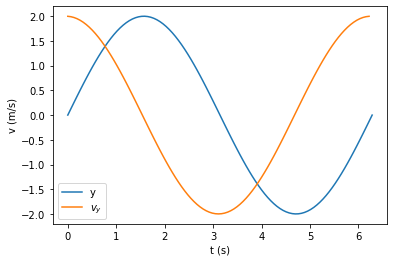

In [9]:
# Code for "Array" method of computing a numerical derivative

A = 2  # amplitude (m)
t = np.linspace(0,2*np.pi,100)  # time array (s)
y = A*np.sin(t)  # position array of oscillator motion (m)

dt_array = t[1:] - t[0:-1]   
dy_array = y[1:] - y[0:-1]   

vel_array = dy_array/dt_array

# make plot of y and velocity vs time
plt.plot(t,y, label = "y")
plt.plot( t[0:len(t) - 1], vel_array, label = "$v_y$")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()

# Task 4: Explain how the alternate Numpy array method works .
* Make sure to explain the three lines of code above that are uncommented on lines 7,8, and 10 for `dt_array`, `dy_array`, and `vel_array`. 
* Specifically, explain how each array index is chosen in the calculations for `dt_array` and `dy_array`. 

# Task 5: Calculate derivative of `height` vs time using the `for` loop method
Use the array `height` generated from your elevator data. 
* Store the resulting velocity array in a variable named `vel_array`
* Start by copying and pasting the `for` loop method shown in Task 3. 
* You can probably solve this by modifying just a few lines of code. 

length of vel_list =  4039
length of t array =  4040


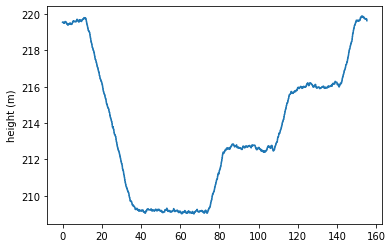

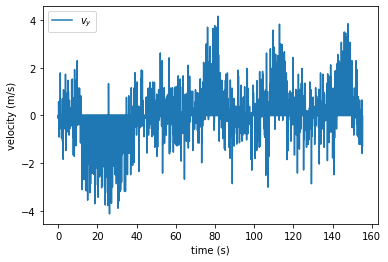

In [11]:
""" Copy and paste the code from Task 3 to create the derivative of the height vs time data 
Modify the minimum number of lines. """

    
### BEGIN SOLUTION
t = my_press[:,0]
y = heights

vel_list = []  # 
i_start = 0
i_end = len(t)-1   # fix this to include as much data as possible
for i in range(i_start, i_end) :
    dy = y[i+1] - y[i]
    dt = t[i+1] - t[i]
    vel_list.append(dy/dt)
    
vel_array = np.array(vel_list)
print("length of vel_list = ",len(vel_list))
print("length of t array = ", len(t))

plt.plot(t,y, label = "y")
plt.ylabel("height (m)")
plt.figure()
plt.plot( t[i_start:i_end], vel_list, label = "$v_y$")
plt.ylabel("velocity (m/s)")
plt.xlabel("time (s)")
plt.legend()

### END SOLUTION

In [12]:
""" Check vel array """
assert len(vel_array) == len(t) -1

# Task 6: Taking derivative of height vs time using the 2nd "array" method 

Use the array `height` generated from your elevator data. 
* Store the resulting velocity array in a variable named **`vel_array_2`**
* Start by copying and pasting the  method shown in Task 4. 
* You can probably solve this by modifying just a few lines of code. 

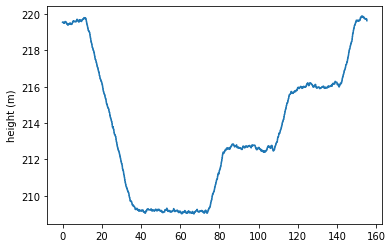

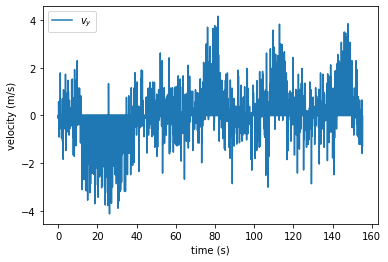

In [14]:
""" Copy and paste the previous task's code to create the derivative of the height vs time data 
Modify the minimum number of lines. """

    
### BEGIN SOLUTION
t = my_press[:,0]
y = heights

dy = y[1:] - y[0:-1]
dt = t[1:] - t[0:-1]
vel_array_2 = dy/dt

plt.plot(t,y, label = "y")
plt.ylabel("height (m)")
plt.figure()
plt.plot( t[0:-1], vel_array_2, label = "$v_y$")
plt.ylabel("velocity (m/s)")
plt.xlabel("time (s)")
plt.legend()

### END SOLUTION

# A comment on noise in numerical derivatives

Computing a numerical derivative will tend to amplify noise in the data. If $\sigma_y$ is the amplitude of the y fluctuations (like an uncertainty in $y$) then the uncertainty in $\sigma_y$ is roughly $\sqrt{2}\sigma_y$.

If we assume there is negligable uncertainty in the time (because the clock on the phone is very accurate) then the 
uncertainty in the velocity is 
$$\sigma_v = \frac{ \sqrt{2} \sigma_y}{dt} $$

You can see from this formula that if $dt$ is very small, the the uncertainty is very large. Alternatively, we can decrease the uncertainty (or noise) in the velocity by increasing $dt$. In other words, you get less noise if you average over longer times. 

Numerically we can do this using a modified version of the derivative where we average over several successive data points rather than adjacent time steps.

$$v_{y} = \frac{\Delta y}{\Delta t} = \frac{y_{i+n} - y_i}{t_{i+n} - t_i} $$
where $n>=1$. By making $n$ larger than 1, we average over longer times and "smooth" the velocity.

# Task 7: Smoothing plot of $v$ vs $t$ 

You goal in this task is
1. store the height data in an array named **`height2`**
1. calculate an unsmoothed derivative stored in **`vel_array`** (should be same as Task 5 or 6, unless you switched data sets)
1. calculate a smoothed derivative stored in **`vel_smooth_array`**

And create a subplot that compares three things
1. height vs time 
1. velocity vs time (without smoothing)
1. velocity vs time (with smoothing)

Your graph should look similar to this one (though it should use your own data, if possible) 
![height, vel, and smoothed vel vs time](height_vel_smoothed_vel.png)

Remember, you have already written code to do most of this. Subplots were covered in PS5A. 

**Which data set should you analyze?**
* If your pressure sensor sampled about 20 times per second, then use your own data.
* If your pressure sensor samples only about once per second, then use Dr. Zwickl's sample data.

In [15]:
""" THIS CODE IS ONLY NEEDED IF YOUR PHONE DIDN'T TAKE PRESSURE DATA 
FAST ENOUGH
pressure data: 
Floor 3 -> A -> 1 -> 2 -> 3 
Held phone (more jitter), a custodian got on and off.
""" 

my_press_Z = np.loadtxt("my_pressure_data_Z.csv", delimiter = ",", skiprows=1)

length of vel_list =  4039
length of t array =  4040
0.03845214617479574


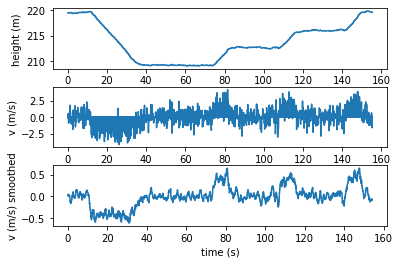

In [17]:
""" Copy and paste the previous task's code to create the derivative of the height vs time data 
Modify the minimum number of lines. """


# put t and y arrays in terms of Dr. Zwickl's pressure data
t = my_press_Z[:,0]
y = p_to_h(my_press_Z[:,1]*100)
height2 = y

# Or use your own data
#t = my_press[:,0]
#y = h_vs_p(my_press[:,1]*100)


### BEGIN SOLUTION

vel_smooth_list = []  # 
vel_list = []

shift = 30 #

for i in range(0, len(t) - 1) :
    dy = y[i+1] - y[i]
    dt = t[i+1] - t[i]
    vel_list.append(dy/dt)

    
for i in range(0, len(t) - shift) :
    dy_smooth = y[i+shift] - y[i]
    dt_smooth = t[i+shift] - t[i]
    vel_smooth_list.append(dy_smooth/dt_smooth)
    
vel_array = np.array(vel_list)
vel_smooth_array = np.array(vel_smooth_list)
print("length of vel_list = ",len(vel_list))
print("length of t array = ", len(t))

print( np.mean( t[1:]-t[0:-1] ) )

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,y, label = "y")
plt.ylabel("height (m)")

plt.subplot(3,1,2)
plt.plot( t[0:-1], vel_list, label = "$v_y$")
plt.ylabel("v (m/s)")

plt.subplot(3,1,3)
plt.plot( t[0:-shift], vel_smooth_list, label = "$v_y$")

plt.ylabel("v (m/s) smoothed")
plt.xlabel("time (s)")
plt.subplots_adjust(hspace = 0.3)

#plt.savefig("height_vel_smoothed_vel.png")

### END SOLUTION

In [18]:
""" Test cases for the smoothed velocity calculation. Make sure you produced a plot with subplots as well. """


assert type( vel_smooth_array ) == np.ndarray  # check to make sure array exists
print(len(height2) - len(vel_array) )
assert len(height2) - len(vel_array) == 1  # check vel_array is derivative with n = 1

n = len(height2) - len(vel_smooth_array) 
print(n)
assert n > 1  # make sure smoothing occured for an interval smaller 
assert vel_array.std() > vel_smooth_array.std() 

1
30


# BONUS: take a subset of data that meets a particular condition
In this case we want to restrict the data to a particular range of times. 
Our normal method of taking a subset looks like `t[0:4]` depends on knowing the subscripts.
Now, we want to subset based on the time values in the time columns.

#### First, here is a generic example

In [19]:
a = np.arange(0,6)  # create a simple array
print(a)
print(a > 3)  # creates an array of True/False values

condition = a > 3  # use the inequality as a condition
print(a[condition]) # subset the array based on the condition

[0 1 2 3 4 5]
[False False False False  True  True]
[4 5]


#### An example showing how to pick the subset of data between $t_{min}$ and $t_{max}$

length of t_short = 4039
length of vel_array = 4039
Mean velocity between t_min and t_max -0.43588293593190175 m/s


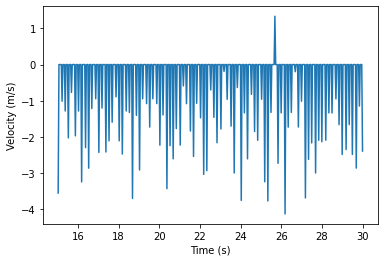

In [20]:


t_short = t[:-1] # shortening time array by 1 makes vel_array and t_short match in length
print("length of t_short =", len(t_short) ) 
print("length of vel_array =", len(vel_array))

tmin = 15
tmax = 30

condition1 = t_short > tmin  # create boolean array, TRUE for t > tmin
condition2 = t_short < tmax  # create boolean array, TRUE for t < tmax

# True when both conditions are met, must use logical_and 
# to take the AND of matching elements in the two arrays
condition = np.logical_and(condition1, condition2) 

# Only plot the subset of data between t_max and t_min

plt.plot(t_short[condition], vel_array[ condition ]) 
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

# compute average veocity between t_min and t_max
print( "Mean velocity between t_min and t_max", np.mean( vel_array[ condition ] ), "m/s" )

# Bonus Task 8: Modify example above to compute average velocity of elevator while it was moving between floors.
* Pick one interval in your data where the elevator was moving between floors.
* Select the subset of data and compute the mean velocity using the approach shown above.
* USE YOUR OWN DATA SET!

In [21]:
### Insert your solution to BONUS TASK 8 here.


